<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        Machine Learning 🧠
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Project: Stroke Prediction Using Machine Learning 🏥
       </h2>
</center>

<div style="font-size:1.3em">
    <span>
    Réalisé par :¶
    </span>
      <ul>
         <li>ELGHABI Taha</li>
         <li>ELBATOURI Badr-eddine</li>
      </ul>
    <span>
    Encadré par :¶
    </span>
      <ul>
         <li>Pr. FISSAA TARIK</li>
      </ul>
</div>


<p style="font-size:2em">📜 Table of Content:</p><br>
<div style="font-size:1.5em">
    <ul>
        <li>
          <a href="#intro">Introduction 🧾</a>
       </li><br>
       <li>
          <a href="#pre-processing">Prepare a dataset 📂</a>
       </li><br>
        <li>
          <a href="#ftr-selct"> Feature Selection 🛒</a>
       </li><br>
       <li>
          <a href="#model-building">Building models 🛠️</a>
       </li><br>
       <li>
          <a href="#model-eval">Model Comparison 📉</a>
       </li><br> 
    </ul>
</div>

<div id="intro">
        <h1 style="color:#1a1a1a">
         Introduction 🧾
        </h1>
</div>

Stroke is the fifth cause of death in the United States, according to the Heart Disease and Stroke Statistics 2020 report. Those who suffer from stroke, if luckily survived, may also suffer from expensive medical bills and even disability. Foreseeing the underlying risk factors of stroke is highly valuable to stroke screening and prevention. In this project, the National Health and Nutrition Examination Survey (NHANES) data from the National Center for Health Statistics (NCHS) is used to develop machine learning models. The NHANES dataset holds an abundance of variables, ranging from demographics, medical history, physical examinations, biochemistry to dietary and lifestyle questionnaires. Known features contributing to stroke, such as blood pressure, serum cholesterol level, alcohol consumption, weight, etc., and additional features will be selected for correlation evaluation and machine learning model development. 

Main elements include data cleaning, imbalance dataset processing, feature selection from over 1,000 variables, and model training.

<h4 style="color:grey"> Importing Liberaries</h4>

In [1]:
# Setup Matplotlib to plot inline ( within the notebook ) 
%matplotlib inline
import matplotlib

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import numPy under the abbreviation 'np'
import numpy as np

import sklearn
import seaborn as sns

In [2]:
#  ignore wornings
import warnings

warnings.filterwarnings("ignore")

<div id="#pre-processing">
        <h1 style="color:#1a1a1a">
            Prepare a dataset 📂
        </h1>
</div>

### Datasets
- NHANES Datasets<br><br>
https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey
<br><br>
- Variable Search<br><br>
https://wwwn.cdc.gov/nchs/nhanes/search/default.aspx
<br><br>
- Varibles Labels<br><br>
https://wwwn.cdc.gov/nchs/nhanes/Search/DataPage.aspx?Component=Demographics&CycleBeginYear=2013
<br><br>


In [3]:
# datasets path and df names
path = [
    'Datasets/demographic.csv',
    'Datasets/examination.csv',
    'Datasets/questionnaire.csv',
    'Datasets/labs.csv',
    'Datasets/diet.csv'  
]

dfname = [
    'dm',
    'exam',
    'qs',
    'lab',
    'diet'
]

In [4]:
# import datasets as dfs

df = {}
dfn = dict(zip(dfname, path))
df = {key: pd.read_csv(value) for key, value in dfn.items()}

In [5]:
Xs = {k: v for k, v in df.items() if k in ['dm', 'exam', 'labs']}

dfs = Xs.values()

from functools import partial, reduce 
inner_merge = partial(pd.merge, how='inner', on='SEQN') 

c = reduce(inner_merge, dfs)
c

# check if there are duplicated SEQN
c.SEQN.duplicated().value_counts()


False    9813
Name: SEQN, dtype: int64

In [6]:
# show combined df
qs = df['qs'][['SEQN','MCQ160F']]
qs

,SEQN,MCQ160F
0,73557,1.0
1,73558,2.0
2,73559,2.0
3,73560,NaN
4,73561,2.0
...,...,...
10170,83727,2.0
10171,83728,NaN
10172,83729,2.0
10173,83730,NaN


In [7]:
c = pd.merge(c,qs, how='left', on='SEQN')
c

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT,MCQ160F
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0,1.0
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0,2.0
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0,2.0
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9808,83727,8,2,1,26,NaN,2,2,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9809,83728,8,2,2,2,24.0,1,1,2.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9810,83729,8,2,2,42,NaN,4,4,2.0,NaN,...,1.0,1.0,3.0,4.0,55.0,1.0,NaN,NaN,3.0,2.0
9811,83730,8,2,1,7,NaN,2,2,1.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
c.MCQ160F.value_counts()

2.0    5389
1.0     194
9.0       5
Name: MCQ160F, dtype: int64

### Exclude rows with null values or NA for MCQ160F
The prediction target in the dataset is MCQ160F, a questionnaire question "Has a doctor or other health professional ever told you that you had a stroke?"


In [9]:
# MCQ160F (target feature): exclude null values and NA
c = c[(c.MCQ160F.notnull()) & (c.MCQ160F != 9)]

# check MCQ160F
c.MCQ160F.describe()

count    5583.000000
mean        1.965252
std         0.183158
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: MCQ160F, dtype: float64

In [10]:
# target varoable counts
c.MCQ160F.value_counts()

2.0    5389
1.0     194
Name: MCQ160F, dtype: int64

### NHANES Labels Scraping 
- Codebook with variable and sas label parsed with Beautiful Soup:


In [11]:
# import code book
Labels = pd.read_csv('Datasets/NHANES_Labels.csv')

Labels

,variable,label
0,SEQN,Respondent sequence number
1,SDDSRVYR,Data release cycle
2,RIDSTATR,Interview/Examination status
3,RIAGENDR,Gender
4,RIDAGEYR,Age in years at screening
...,...,...
3846,WHD140,Self-reported greatest weight (pounds)
3847,WHQ150,Age when heaviest weight
3848,WHQ030M,How do you consider your weight
3849,WHQ500,Trying to do about weight


### Data Cleaning

In [12]:
# exclude non-numeric values
d = c.select_dtypes(['number'])

# exclue columns that have over 50% NaN
d = d.dropna(thresh = 0.5*len(d), axis =1)

print(len(d.columns), 'columns left')

153 columns left


In [13]:
# changing target variable coding from 1, 2 to 0 (Negative), 1 (Positive)
d['MCQ160F']=d.apply(lambda x: 1 if x.MCQ160F == 1 else 0, axis='columns')
d.MCQ160F.value_counts()

0    5389
1     194
Name: MCQ160F, dtype: int64

<div id="ftr-selct">
        <h1 style="color:#1a1a1a">
              Feature Selection 🛒
        </h1>
</div>

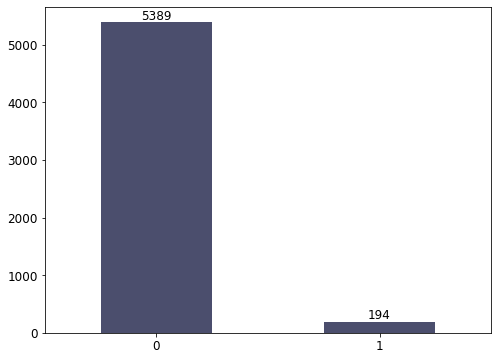

In [14]:
vals = d.MCQ160F.value_counts()

plt.figure(figsize=(8,6))
plt.rc('font', size=12)

ax = vals.plot.bar(rot=0, color='#4B4E6D')

for i in range(len(vals)):
    ax.annotate(vals[i], xy=[vals.index[i], vals[i]], ha='center', va='bottom')

In [15]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(strategy='most_frequent')

d = pd.DataFrame(imp_mode.fit_transform(d), columns=d.columns)

### Train/Test Split

In [16]:
X = d.loc[:, d.columns != 'MCQ160F']
y = d.MCQ160F

In [17]:
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (5583, 152)
y shape: (5583,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

### XGBClassifier for feature selection
From the classificaiton result, the accuracy is pretty decent. However once look into the confusion matrix we can see there is only 1 correct prediction for class 1 (recall for class 1 is bad). This is commonly seen for imbalanced dataset, which the classes in the dataset have highly uneven sample sizes. Imbalanced problems is often seen in healthcare  datasets.

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

def confusion(y_test, y_pred):
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
    print('Confusion Matrix:')
    print(conf)
    return conf

confusion(y_test, y_pred)

[12:00:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 96.33%
Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1075           1
True[1]          40           1


,Predict[0],Predict[1]
True[0],1075,1
True[1],40,1


### Upsampling minority class
In the following cells the minority class is upsampled with SMOTE (Synthetic Minority Oversampling Technique).

In [20]:
y_test.value_counts()


0.0    1076
1.0      41
Name: MCQ160F, dtype: int64

#### Oversampling with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = smote.fit_resample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [22]:
print(y_train_sm.value_counts())
print(y_test_sm.value_counts())

0.0    4313
1.0    4313
Name: MCQ160F, dtype: int64
0.0    1076
1.0    1076
Name: MCQ160F, dtype: int64


#### Check the Classification Result Again
After oversampling, the classification result is more reasonable.

In [23]:
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)
y_pred_sm = model.predict(X_test_sm)

accuracy = accuracy_score(y_test_sm, y_pred_sm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
conf = pd.DataFrame(confusion_matrix(y_test_sm, y_pred_sm), index=['True[0]', 'True[1]'], columns=['Predict[0]', 'Predict[1]'])
conf

[12:00:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 95.40%


,Predict[0],Predict[1]
True[0],1073,3
True[1],96,980


### Feature Selection with XGBoost

[12:00:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

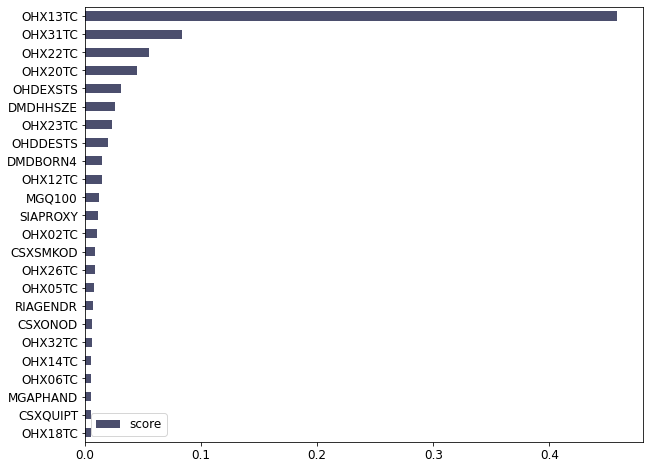

In [24]:
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X_train_sm, y_train_sm)

# Features selected by XGBoost
keys = list(model.get_booster().feature_names)
values = list(model.feature_importances_)

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)

# Top 24 features
xgbfs_ = data[:24]

# Plot feature score
xgbfs_.sort_values(by='score').plot(kind='barh', figsize=(10, 8), color='#4B4E6D')


In [25]:
xgbfs_.reset_index()

,index,score
0,OHX13TC,0.457828
1,OHX31TC,0.083413
2,OHX22TC,0.055476
3,OHX20TC,0.044917
4,OHDEXSTS,0.030556
5,DMDHHSZE,0.025390
6,OHX23TC,0.022904
7,OHDDESTS,0.019462
8,DMDBORN4,0.014271
9,OHX12TC,0.014230


### Merge SAS Labels from the codebook

In [26]:
xgbfs = xgbfs_.reset_index()
xgbfs.columns=['variable', 'score']

xgbfs['variable'] = xgbfs['variable'].apply(lambda x: x.upper())

xgbfs = pd.merge(left=xgbfs, right=Labels, left_on='variable', right_on='variable', how='left')
xgbfs

,variable,score,label
0,OHX13TC,0.457828,Tooth Count: #13
1,OHX31TC,0.083413,Tooth Count: #31
2,OHX22TC,0.055476,Tooth Count: #22
3,OHX20TC,0.044917,Tooth Count: #20
4,OHDEXSTS,0.030556,Overall Oral Health Exam Status
5,DMDHHSZE,0.025390,# of adults 60 years or older in HH
6,OHX23TC,0.022904,Tooth Count: #23
7,OHDDESTS,0.019462,Dentition Status Code
8,DMDBORN4,0.014271,Country of birth
9,OHX12TC,0.014230,Tooth Count: #12


In [27]:
# final variables
var_list = xgbfs.variable.tolist()
var_list.append('MCQ160F')
print(var_list)

['OHX13TC', 'OHX31TC', 'OHX22TC', 'OHX20TC', 'OHDEXSTS', 'DMDHHSZE', 'OHX23TC', 'OHDDESTS', 'DMDBORN4', 'OHX12TC', 'MGQ100', 'SIAPROXY', 'OHX02TC', 'CSXSMKOD', 'OHX26TC', 'OHX05TC', 'RIAGENDR', 'CSXONOD', 'OHX32TC', 'OHX14TC', 'OHX06TC', 'MGAPHAND', 'CSXQUIPT', 'OHX18TC', 'MCQ160F']


In [28]:
#final df
df_final = d.filter(var_list)
df_final

,OHX13TC,OHX31TC,OHX22TC,OHX20TC,OHDEXSTS,DMDHHSZE,OHX23TC,OHDDESTS,DMDBORN4,OHX12TC,...,OHX05TC,RIAGENDR,CSXONOD,OHX32TC,OHX14TC,OHX06TC,MGAPHAND,CSXQUIPT,OHX18TC,MCQ160F
0,4.0,4.0,4.0,4.0,1.0,2.0,4.0,1.0,1.0,4.0,...,4.0,1.0,1.0,4.0,4.0,4.0,1.0,4.0,4.0,1.0
1,2.0,4.0,2.0,5.0,1.0,0.0,2.0,1.0,1.0,2.0,...,2.0,1.0,3.0,4.0,2.0,2.0,1.0,4.0,4.0,0.0
2,2.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,...,2.0,1.0,3.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0
3,2.0,4.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,3.0,4.0,2.0,2.0,1.0,2.0,4.0,0.0
4,4.0,4.0,2.0,4.0,1.0,0.0,2.0,1.0,1.0,4.0,...,2.0,1.0,3.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,4.0,5.0,2.0,4.0,1.0,2.0,2.0,1.0,1.0,4.0,...,4.0,1.0,3.0,4.0,4.0,2.0,1.0,2.0,4.0,0.0
5579,2.0,4.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,4.0,...,2.0,1.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,0.0
5580,2.0,2.0,2.0,2.0,3.0,0.0,2.0,3.0,2.0,2.0,...,2.0,1.0,3.0,4.0,2.0,2.0,2.0,1.0,2.0,0.0
5581,2.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,4.0,...,4.0,1.0,3.0,4.0,2.0,2.0,1.0,2.0,2.0,0.0


<AxesSubplot:>

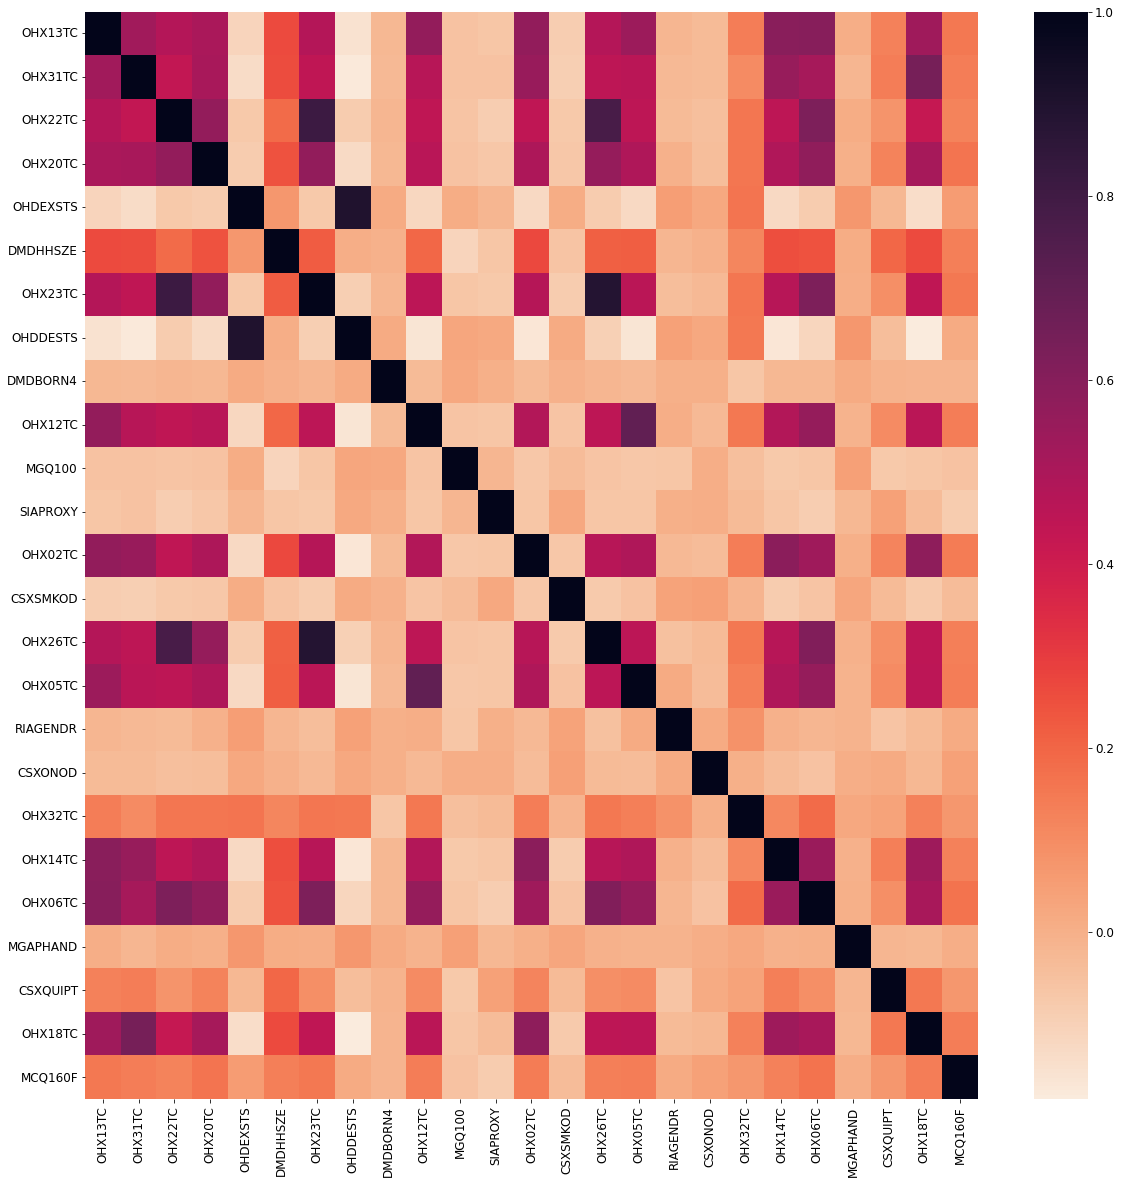

In [29]:
# sns.axes_style("white")
ax = plt.subplots(figsize=(20,20))

corr = df_final.corr()

# sns.heatmap(corr, vmin=-1, vmax=1, cmap=sns.cm.rocket_r)
sns.heatmap(corr, cmap=sns.cm.rocket_r)

<div id="model-building">
        <h1 style="color:#1a1a1a">
         Model Building ⚙️
        </h1>
</div>

### Train/Test Split

In [30]:
X_ = df_final.loc[:, df_final.columns != 'MCQ160F']
y = df_final.MCQ160F

### Data Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
X = pd.DataFrame(minmax.fit_transform(X_), columns=X_.columns)
X

,OHX13TC,OHX31TC,OHX22TC,OHX20TC,OHDEXSTS,DMDHHSZE,OHX23TC,OHDDESTS,DMDBORN4,OHX12TC,...,OHX26TC,OHX05TC,RIAGENDR,CSXONOD,OHX32TC,OHX14TC,OHX06TC,MGAPHAND,CSXQUIPT,OHX18TC
0,0.75,0.666667,0.666667,0.75,0.0,0.666667,0.666667,0.0,0.000000,0.666667,...,0.666667,0.666667,0.0,0.000000,0.666667,0.666667,0.75,0.0,0.75,0.666667
1,0.25,0.666667,0.000000,1.00,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.666667,0.666667,0.000000,0.25,0.0,0.75,0.666667
2,0.25,0.666667,0.000000,0.25,0.0,0.666667,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.666667,0.666667,0.000000,0.25,0.0,0.00,0.000000
3,0.25,0.666667,0.000000,0.75,0.0,0.666667,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,1.0,0.666667,0.666667,0.000000,0.25,0.0,0.25,0.666667
4,0.75,0.666667,0.000000,0.75,0.0,0.000000,0.000000,0.0,0.000000,0.666667,...,0.000000,0.000000,0.0,0.666667,0.666667,0.666667,0.75,0.0,0.75,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,0.75,1.000000,0.000000,0.75,0.0,0.666667,0.000000,0.0,0.000000,0.666667,...,0.000000,0.666667,0.0,0.666667,0.666667,0.666667,0.25,0.0,0.25,0.666667
5579,0.25,0.666667,0.000000,0.25,0.0,0.666667,0.000000,0.0,0.000000,0.666667,...,0.000000,0.000000,0.0,0.666667,0.666667,0.000000,0.25,0.0,0.75,0.000000
5580,0.25,0.000000,0.000000,0.25,1.0,0.000000,0.000000,1.0,0.013158,0.000000,...,0.000000,0.000000,0.0,0.666667,0.666667,0.000000,0.25,1.0,0.00,0.000000
5581,0.25,0.000000,0.000000,0.25,0.0,0.000000,0.000000,0.0,0.000000,0.666667,...,0.000000,0.666667,0.0,0.666667,0.666667,0.000000,0.25,0.0,0.25,0.000000


### Upsampling Minoroty Class with SMOTE
Note that it is important to only oversample after train/test split, so the testing data will not leak.

In [32]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
# X_test_sm, y_test_sm = smote.fit_sample(X_test, y_test)

X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
# X_test_sm = pd.DataFrame(X_test_sm, columns=X.columns)

In [35]:
print('X train shape: ',X_train_sm.shape)
print('y train values: \n', y_train_sm.value_counts())
print()
print('X test shape: ',X_test.shape)
print('y test values: \n', y_test.value_counts())

X train shape:  (8066, 24)
y train values: 
 0.0    4033
1.0    4033
Name: MCQ160F, dtype: int64

X test shape:  (1396, 24)
y test values: 
 0.0    1356
1.0      40
Name: MCQ160F, dtype: int64


In [37]:
mscore=[]

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11).fit(X_train_sm, y_train_sm)
y_pred = clf.predict(X_test)

print('Accuracy Score:', clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Logistic Regression', clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.7671919770773639
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.77      0.87      1356
         1.0       0.08      0.65      0.14        40

    accuracy                           0.77      1396
   macro avg       0.53      0.71      0.50      1396
weighted avg       0.96      0.77      0.84      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1045         311
True[1]          14          26


,Predict[0],Predict[1]
True[0],1045,311
True[1],14,26


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11)
rnd_clf.fit(X_train_sm, y_train_sm)

y_pred = rnd_clf.predict(X_test)

print('Accuracy Score:', rnd_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Random Forest', rnd_clf.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.8610315186246418
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1356
         1.0       0.11      0.53      0.18        40

    accuracy                           0.86      1396
   macro avg       0.55      0.70      0.55      1396
weighted avg       0.96      0.86      0.90      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]        1181         175
True[1]          19          21


,Predict[0],Predict[1]
True[0],1181,175
True[1],19,21


### Gradient Boosting Decision Trees

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10, random_state=11)
gbc.fit(X_train_sm, y_train_sm)

y_pred = gbc.predict(X_test)

print('Accuracy Score:', gbc.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['GradientBoosting', gbc.score(X_test, y_test)])

print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.7320916905444126
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84      1356
         1.0       0.07      0.65      0.12        40

    accuracy                           0.73      1396
   macro avg       0.53      0.69      0.48      1396
weighted avg       0.96      0.73      0.82      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         996         360
True[1]          14          26


,Predict[0],Predict[1]
True[0],996,360
True[1],14,26


### AdaBoostClassifier

In [41]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(learning_rate=0.01, n_estimators=30, random_state=11)
ada.fit(X_train_sm, y_train_sm)

y_pred = ada.predict(X_test)

print('Accuracy Score:', ada.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['Adaptive Boosting', ada.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.6210601719197708
Prediction: [0. 0. 0. ... 0. 1. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.62      0.76      1356
         1.0       0.06      0.80      0.11        40

    accuracy                           0.62      1396
   macro avg       0.52      0.71      0.43      1396
weighted avg       0.96      0.62      0.74      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         835         521
True[1]           8          32


,Predict[0],Predict[1]
True[0],835,521
True[1],8,32


### SVM

In [42]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='sigmoid', gamma='auto', random_state=11)
svm_clf.fit(X_train_sm, y_train_sm)
y_pred = svm_clf.predict(X_test)

print('Accuracy Score:', svm_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['SVM', svm_clf.score(X_test, y_test)])

# from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

Accuracy Score: 0.7349570200573066
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84      1356
         1.0       0.08      0.78      0.14        40

    accuracy                           0.73      1396
   macro avg       0.54      0.75      0.49      1396
weighted avg       0.96      0.73      0.82      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         995         361
True[1]           9          31


,Predict[0],Predict[1]
True[0],995,361
True[1],9,31


### XGBoost

In [43]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(eta=0.01, max_depth=3)
# xgbc = XGBClassifier(eta=0.01)
xgbc.fit(X_train_sm, y_train_sm)

y_pred = xgbc.predict(X_test)

print('Accuracy Score:', svm_clf.score(X_test, y_test))
print('Prediction:', y_pred)

mscore.append(['XGBoost', xgbc.score(X_test, y_test)])

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

[12:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.7349570200573066
Prediction: [0. 0. 0. ... 0. 0. 1.]
              precision    recall  f1-score   support

         0.0       0.99      0.72      0.84      1356
         1.0       0.07      0.68      0.12        40

    accuracy                           0.72      1396
   macro avg       0.53      0.70      0.48      1396
weighted avg       0.96      0.72      0.82      1396

Confusion Matrix:
         Predict[0]  Predict[1]
True[0]         983         373
True[1]          13          27


,Predict[0],Predict[1]
True[0],983,373
True[1],13,27


<div id="model-eval">
        <h1 style="color:#1a1a1a">
        Model Comparison 📉
        </h1>
</div>

In [44]:
mscore.sort(key=lambda x: x[1], reverse=True)
mscore

[['Random Forest', 0.8610315186246418],
 ['Logistic Regression', 0.7671919770773639],
 ['SVM', 0.7349570200573066],
 ['GradientBoosting', 0.7320916905444126],
 ['XGBoost', 0.7234957020057307],
 ['Adaptive Boosting', 0.6210601719197708]]

Accracy Score: 

Random Forest: 86.1%
Logistic Regression: 76.72%
SVM: 73.5%
GradientBoosting: 73.21%
XGBoost: 72.35%
Adaptive Boosting: 62.11%


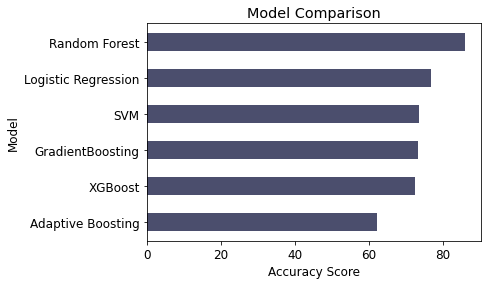

In [45]:
model = list(i[0] for i in mscore)
score = list(round(i[1]*100,2) for i in mscore)

print('Accracy Score: \n')
for m,s in zip(model, score):
    print(f'{m}: {s}%')
  
 
# creating horizontal bar plot
plt.barh(model, score, height = 0.5, color='#4B4E6D') # this color is called independence, how cool!
 
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.title("Model Comparison")
plt.gca().invert_yaxis()
plt.show()